In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('mimic_synthetic_train.csv')   # Read train data
test = pd.read_csv('die_test.csv')                 # Read test data
train = train.drop([0],axis=0)                     # Remove noise added row

/home/loser/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (291,336) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Gender_mapping={'M':0,'F':1}                       # convert string to numeric
train['GENDER']=train['GENDER'].map(Gender_mapping)
test['GENDER']=test['GENDER'].map(Gender_mapping)

In [4]:
ICU_mapping={'CCU':1, 'MICU':2, 'TSICU':3, 'CSRU':4, 'SICU':5}   # convert string to numeric
train['ICU']=train['ICU'].map(ICU_mapping)
test['ICU']=test['ICU'].map(ICU_mapping)

In [5]:
train=train.iloc[:,9:]                                           # Remove non-repeated string data
test=test.iloc[:,9:]

In [6]:
train['Otnutritdx']=train['Otnutritdx'].astype(float)            # Make string to float type
test['Otnutritdx']=test['Otnutritdx'].astype(float)

In [7]:
train['Othnervdx']=train['Othnervdx'].astype(float)              # Make string to float type
test['Othnervdx']=test['Othnervdx'].astype(float)

In [8]:
for i in train:                                                  # Fill the missing value by mean  
    mean_value=train[i].mean()
    train[i]=train[i].fillna(mean_value)
for i in test:
    mean_value=test[i].mean()
    test[i]=test[i].fillna(mean_value)    

In [9]:
train_1=train[train['Output']>0]
train_0_raw=train[train['Output']<1] 
train_0=train_0_raw.iloc[:2798,:]
train=pd.concat([train_0,train_1])

In [10]:
X = train.iloc[:,:-1]                                           #Train data without output class

In [11]:
Y = train.iloc[:,-1:]                                           # Output class

In [12]:
from imblearn.over_sampling import SMOTE                        # Balance imbalance data
sm = SMOTE(random_state=2)
X, Y = sm.fit_sample(X, np.ravel(Y))
print(sum(Y==0))
print(sum(Y==1))

/home/loser/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


2798
2798


In [13]:
from sklearn.preprocessing import StandardScaler                #Make standard scale
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
test = sc_X.transform(test)

In [14]:
from sklearn.model_selection import train_test_split            #Split data into train & test data 
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size = 0.20, random_state = 42)

/home/loser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


75.8


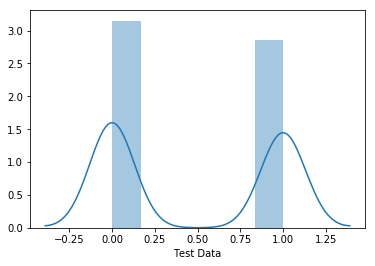

In [15]:
#Logistic Regression
from sklearn.metrics import accuracy_score  
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()                                    #Logistic Regression
logreg.fit(x_train, y_train)
x = pd.Series(y_test, name="Test Data")
ax = sns.distplot(x)
y_pred = logreg.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)      # Find Accuracy
print(acc_logreg)

/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


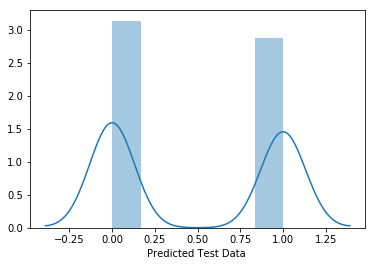

In [16]:
x = pd.Series(y_pred, name="Predicted Test Data ")
ax = sns.distplot(x)

/home/loser/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


75.71


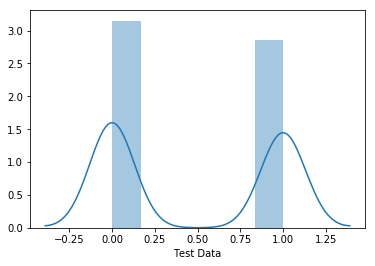

In [17]:
# Support Vector Machines
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


svc = SVC()
svc.fit(x_train, y_train)
x = pd.Series(y_test, name="Test Data")
ax = sns.distplot(x)
y_pred = svc.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)


/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


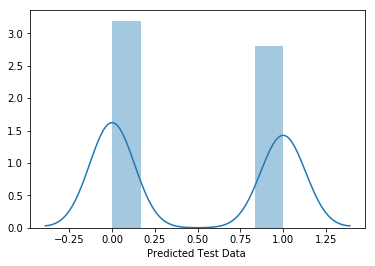

In [18]:
x = pd.Series(y_pred, name="Predicted Test Data ")
ax = sns.distplot(x)

/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


48.75


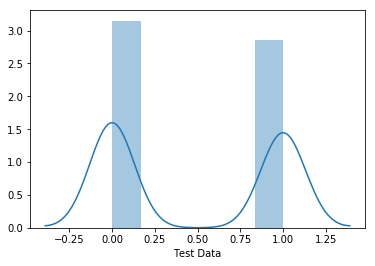

In [19]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
x = pd.Series(y_test, name="Test Data")
ax = sns.distplot(x)
y_pred = gaussian.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


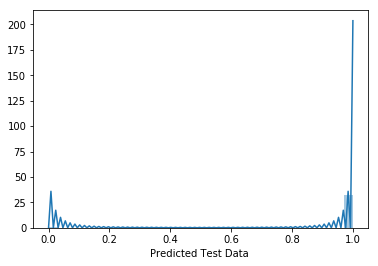

In [20]:
x = pd.Series(y_pred, name="Predicted Test Data ")
ax = sns.distplot(x)

76.7


/home/loser/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


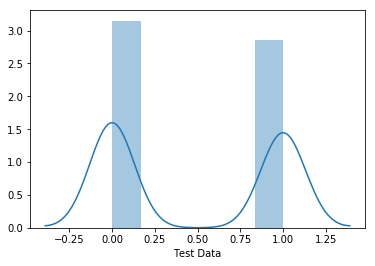

In [21]:
#Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
x = pd.Series(y_test, name="Test Data")
ax = sns.distplot(x)
y_pred = linear_svc.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


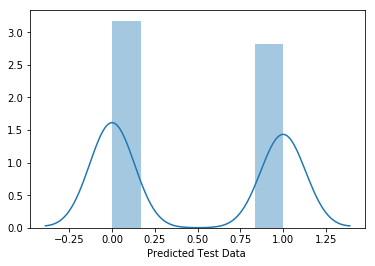

In [22]:
x = pd.Series(y_pred, name="Predicted Test Data ")
ax = sns.distplot(x)

/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


76.7


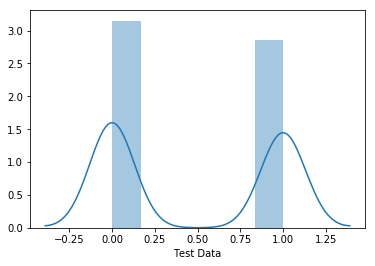

In [23]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
x = pd.Series(y_test, name="Test Data")
ax = sns.distplot(x)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


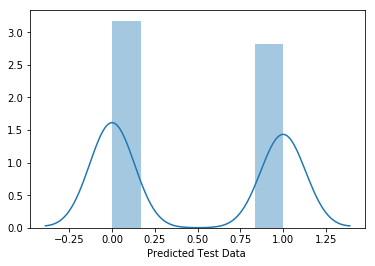

In [24]:
x = pd.Series(y_pred, name="Predicted Test Data ")
ax = sns.distplot(x)

60.89


/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


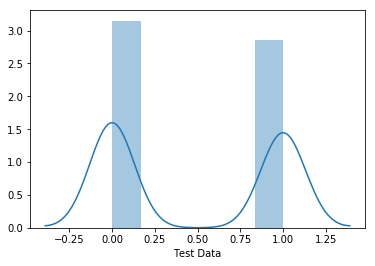

In [25]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
x = pd.Series(y_test, name="Test Data")
ax = sns.distplot(x)
y_pred = decisiontree.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


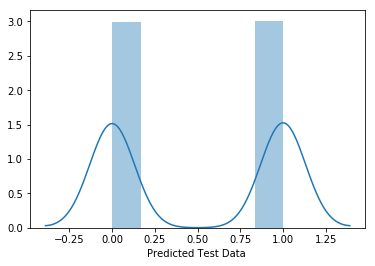

In [26]:
x = pd.Series(y_pred, name="Predicted Test Data ")
ax = sns.distplot(x)

/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


72.86


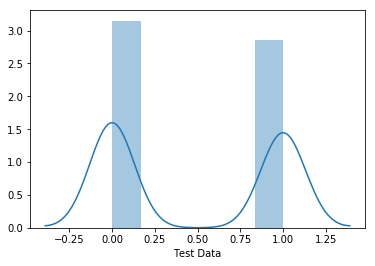

In [27]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest =  RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
randomforest.fit(x_train, y_train)
x = pd.Series(y_test, name="Test Data")
ax = sns.distplot(x)
y_pred = randomforest.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


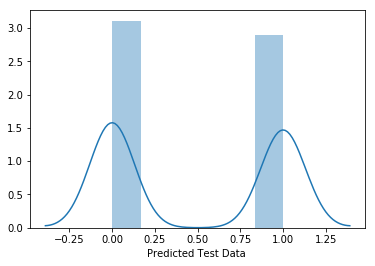

In [28]:
x = pd.Series(y_pred, name="Predicted Test Data ")
ax = sns.distplot(x)

74.82


/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


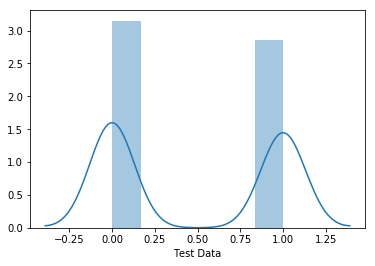

In [29]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
x = pd.Series(y_test, name="Test Data")
ax = sns.distplot(x)
y_pred = gbk.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)



/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


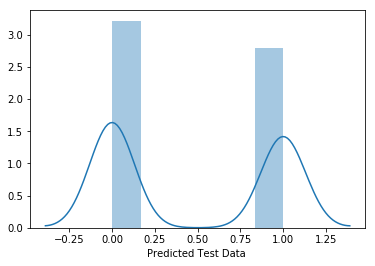

In [30]:
x = pd.Series(y_pred, name="Predicted Test Data ")
ax = sns.distplot(x)

/home/loser/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'learning_rate': 0.15, 'n_estimators': 122}
76.34


/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


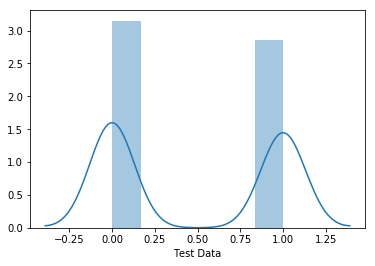

In [31]:
#Light GBM

import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l2', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(20, 150, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid,n_jobs=-1)
grid.fit(x_train, y_train)
print (grid.best_params_)
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 148, num_leaves = 38)
estimator.fit(x_train,y_train)
x = pd.Series(y_test, name="Test Data")
ax = sns.distplot(x)
y_pred = estimator.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)



/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


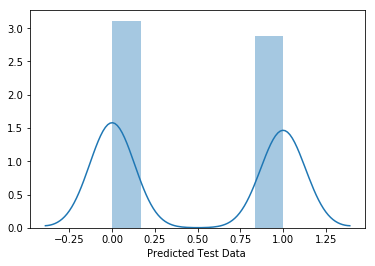

In [32]:
x = pd.Series(y_pred, name="Predicted Test Data ")
ax = sns.distplot(x)

/home/loser/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/loser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=332, units=350, kernel_initializer="uniform")`
  
/home/loser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=350, kernel_initializer="uniform")`
  import sys
/home/loser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=350, kernel_initializer="uniform")`
  
/home/loser/anaconda3/

Epoch 1/100
5596/5596 [==============================] - 2s 375us/step - loss: 0.6322 - acc: 0.6464
Epoch 2/100
5596/5596 [==============================] - 1s 97us/step - loss: 0.5214 - acc: 0.7477
Epoch 3/100
5596/5596 [==============================] - 1s 95us/step - loss: 0.4795 - acc: 0.7752
Epoch 4/100
5596/5596 [==============================] - 0s 89us/step - loss: 0.4448 - acc: 0.7925
Epoch 5/100
5596/5596 [==============================] - 1s 109us/step - loss: 0.4030 - acc: 0.8220
Epoch 6/100
5596/5596 [==============================] - 0s 84us/step - loss: 0.3567 - acc: 0.8451
Epoch 7/100
5596/5596 [==============================] - 1s 93us/step - loss: 0.3094 - acc: 0.8715
Epoch 8/100
5596/5596 [==============================] - 0s 72us/step - loss: 0.2750 - acc: 0.8883
Epoch 9/100
5596/5596 [==============================] - 0s 72us/step - loss: 0.2319 - acc: 0.9076
Epoch 10/100
5596/5596 [==============================] - 1s 113us/step - loss: 0.1872 - acc: 0.9287
Epoch 

/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1120
1117
99.73


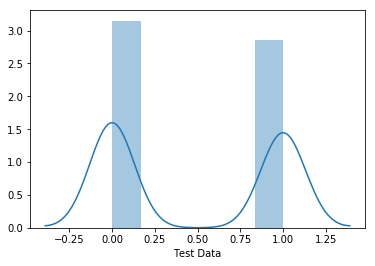

In [33]:
# Deep Neural Network
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(output_dim=350,init='uniform',activation='relu',input_dim=332))
classifier.add(Dense(output_dim=350,init='uniform',activation='relu'))
classifier.add(Dense(output_dim=350,init='uniform',activation='relu'))
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X,Y,batch_size=500,nb_epoch=100)
x = pd.Series(y_test, name="Test Data")
ax = sns.distplot(x)
y_pred = classifier.predict(x_test)
l=[]
for i in range(len(y_pred)) :
    if(y_pred[i]>0.5):
        l.append(1)
    else:
        l.append(0)
j=0
count=0
for i in l :
    if l[j]==y_test[j]:
        count = count+1
    j=j+1
print(j)
print(count)
acc_logreg = round(accuracy_score(l, y_test) * 100, 2)
print(acc_logreg)


/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


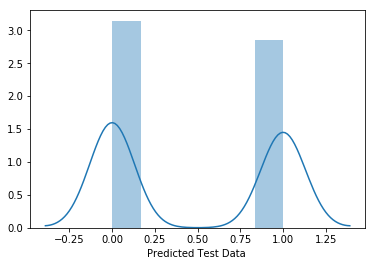

In [35]:
x = pd.Series(l, name="Predicted Test Data ")
ax = sns.distplot(x)

In [ ]:
for i in range(len(Y_test)) :
    if(Y_test[i]>0.5):
        Y_test[i]=1
    else:
        Y_test[i]=0

In [ ]:
Y_test = Y_test.astype('int')

In [ ]:
import csv

with open('mimic_synthetic_test.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    for i in Y_test:
        writer.writerow([i])

csvFile.close()